In [2]:
#Install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')#estilo tipo bmh

In [4]:
#load the data
#from google.colab import files
#uploaded = files.upload()

In [6]:
df = pd.read_csv('C:\\Users\\9Abel\\Documents\\Program\\Python\\BigData\\Machine Learning\\NFLX_Stock.csv')
df.head(6)#regresa los primeros 6

,Date,Open Price,Close Price,Adj Close,Volume
0,2022-01-03,605.609985,597.369995,597.369995,3067500
1,2022-01-04,599.909973,591.150024,591.150024,4393100
2,2022-01-05,592.000000,567.520020,567.520020,4148700
3,2022-01-06,554.340027,553.289978,553.289978,5711800
4,2022-01-07,549.460022,541.059998,541.059998,3382900
5,2022-01-10,538.489990,539.849976,539.849976,4486100


In [7]:
#Get the number of trading days
df.shape

(153, 5)

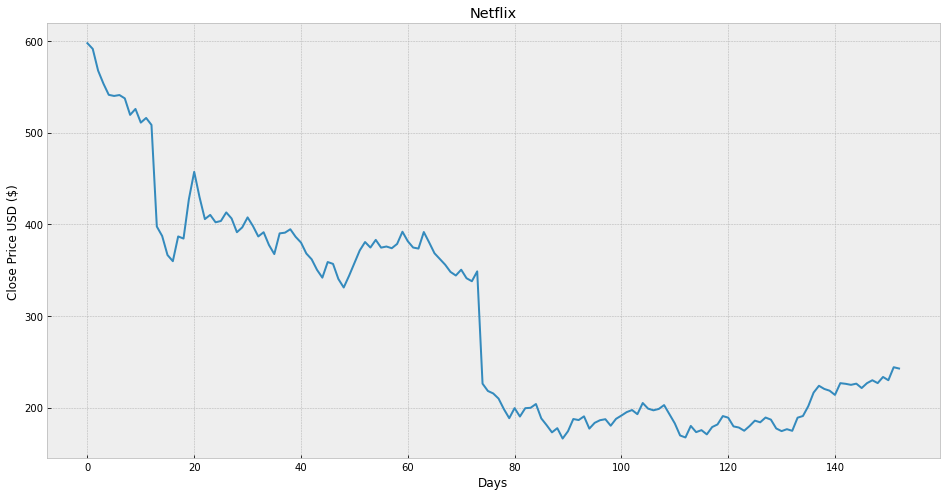

In [8]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close Price'])
plt.show()

In [9]:
#Get the close price
df = df[['Close Price']]
df.head(4)

,Close Price
0,597.369995
1,591.150024
2,567.520020
3,553.289978


In [11]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close Price']].shift(-future_days)
df.tail(4)#tail es para ver las ultimos 4 renglones del dataframe

,Close Price,Prediction
149,233.490005,NaN
150,229.940002,NaN
151,244.110001,NaN
152,242.699997,NaN


In [12]:
#Create the feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[597.369995]
 [591.150024]
 [567.52002 ]
 [553.289978]
 [541.059998]
 [539.849976]
 [540.840027]
 [537.219971]
 [519.200012]
 [525.690002]
 [510.799988]
 [515.859985]
 [508.25    ]
 [397.5     ]
 [387.149994]
 [366.420013]
 [359.700012]
 [386.700012]
 [384.359985]
 [427.140015]
 [457.130005]
 [429.480011]
 [405.600006]
 [410.170013]
 [402.100006]
 [403.529999]
 [412.890015]
 [406.269989]
 [391.309998]
 [396.570007]
 [407.459991]
 [398.079987]
 [386.670013]
 [391.290009]
 [377.380005]
 [367.459991]
 [390.029999]
 [390.799988]
 [394.519989]
 [386.23999 ]
 [380.029999]
 [368.070007]
 [361.730011]
 [350.26001 ]
 [341.76001 ]
 [358.790009]
 [356.769989]
 [340.320007]
 [331.01001 ]
 [343.75    ]
 [357.529999]
 [371.399994]
 [380.600006]
 [374.589996]
 [382.920013]
 [374.48999 ]
 [375.709991]
 [373.850006]
 [378.51001 ]
 [391.820007]
 [381.470001]
 [374.589996]
 [373.470001]
 [391.5     ]
 [380.149994]
 [368.350006]
 [362.149994]
 [355.880005]
 [348.      ]
 [344.100006]
 [350.429993]
 [341.

In [14]:
#Create the target data set (y) and convert it to a numpy array 
#and get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[403.529999 412.890015 406.269989 391.309998 396.570007 407.459991
 398.079987 386.670013 391.290009 377.380005 367.459991 390.029999
 390.799988 394.519989 386.23999  380.029999 368.070007 361.730011
 350.26001  341.76001  358.790009 356.769989 340.320007 331.01001
 343.75     357.529999 371.399994 380.600006 374.589996 382.920013
 374.48999  375.709991 373.850006 378.51001  391.820007 381.470001
 374.589996 373.470001 391.5      380.149994 368.350006 362.149994
 355.880005 348.       344.100006 350.429993 341.130005 337.859985
 348.609985 226.190002 218.220001 215.520004 209.910004 198.399994
 188.539993 199.520004 190.360001 199.460007 199.869995 204.009995
 188.320007 180.970001 173.100006 177.660004 166.369995 174.309998
 187.639999 186.509995 190.559998 177.190002 183.479996 186.350006
 187.440002 180.339996 187.830002 191.399994 195.190002 197.440002
 192.910004 205.089996 198.979996 197.139999 198.610001 202.830002
 192.770004 182.940002 169.690002 167.539993 180.110001 173.350

In [16]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [18]:
#Create the models
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [19]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)#aqui convertimos el conjunto de datos en una matriz numpy
x_future

array([[192.910004],
       [205.089996],
       [198.979996],
       [197.139999],
       [198.610001],
       [202.830002],
       [192.770004],
       [182.940002],
       [169.690002],
       [167.539993],
       [180.110001],
       [173.350006],
       [175.509995],
       [170.910004],
       [178.889999],
       [181.710007],
       [190.850006],
       [189.139999],
       [179.600006],
       [178.360001],
       [174.869995],
       [179.949997],
       [185.880005],
       [184.059998],
       [189.270004]])

In [21]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[186.979996 177.339996 174.449997 192.910004 174.779999 189.110001
 190.919998 201.630005 216.440002 223.880005 174.869995 167.539993
 213.910004 226.75     226.020004 224.899994 226.210007 242.699997
 226.729996 226.020004 175.509995 226.729996 179.600006 244.110001
 242.699997]

[193.1496002  199.75555705 196.44172923 195.44378598 196.24105824
 198.52982366 193.07366961 187.7422565  180.55596867 179.38988689
 186.20737335 182.54101336 183.7125079  181.21765059 185.54569142
 187.07515475 192.03233691 191.10489521 185.93077177 185.25824099
 183.36539664 186.12059336 189.33680048 188.34969903 191.1754049 ]


<ipython-input-24-313a2bd5115c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


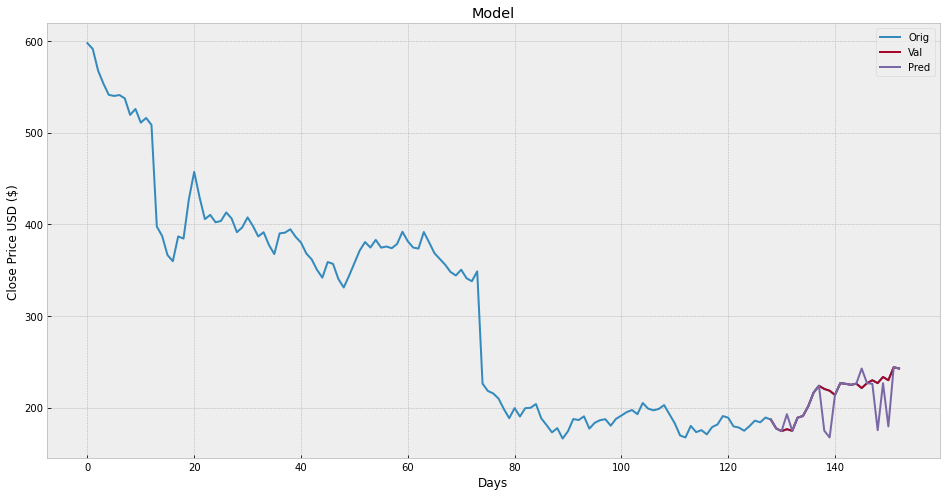

In [24]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

<ipython-input-25-f19ee01d3e4f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


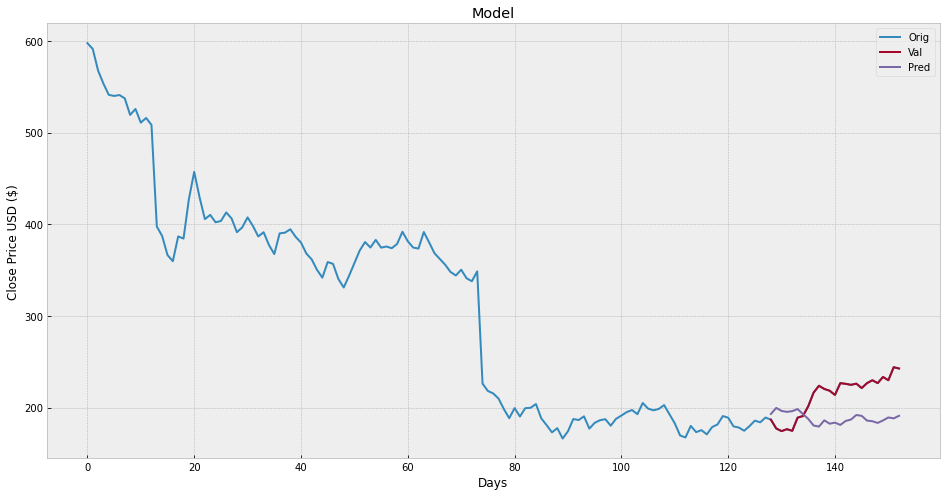

In [25]:
#Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()